In [1]:
import glob
import os.path
import pickle
import random
import colorsys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.lines import Line2D
from scipy import stats

from summary_plots import vonmises_kde, fovdur_vs_sacang, get_BDIR_per_frames, evaluate_all_obj

## Find differences in two dataframes with identical config

In [2]:
df_0 = pd.read_csv("/scratch/vito/scanpathes/results/2024-03-05-12-46-32_TEST_task0.001_entropy0.5_dv3.0_sig0.35/df_res_fov.csv", index_col=0)
df_1 = pd.read_csv("/scratch/vito/scanpathes/results/2024-03-06-18-50-28_TEST_PRESAC0.5_task0.001_entropy0.5_dv3.0_sig0.3/df_res_fov.csv", index_col=0)
df_2 = pd.read_csv("/scratch/vito/scanpathes/results/2024-03-06-18-50-26_TEST_PRESAC0.5_task0.001_entropy0.5_dv3.0_sig0.35/df_res_fov.csv", index_col=0)

# show rows where df_0 is different from df_1
df_diff = df_0[~df_0.isin(df_2)].dropna()
df_diff

,nfov,video,subject,frame_start,frame_end,duration_ms,x_start,y_start,x_end,y_end,sac_amp_dva,sac_dur,sac_ang_h,sac_ang_p,gt_object,fov_end,fov_start,fov_category,ret_times
2794,3.0,-0IEt9-NeV4,2.0,40.0,47.0,243.400478,460.0,202.0,481.0,96.0,3.965043,33.705617,-104.942284,-146.29575,Object 1,1585.439211,1308.333116,R,854.900778


In [3]:
fd_mean_0 = np.mean(df_0["duration_ms"].dropna().values)
fd_mean_1 = np.mean(df_1["duration_ms"].dropna().values)
ff_mean_2 = np.mean(df_2["duration_ms"].dropna().values)
print(fd_mean_0, fd_mean_1, ff_mean_2)

412.4025308370963 412.7216059631467 412.31231598657723


In [4]:
len(df_1["duration_ms"].values) # == df_1["duration_ms"].values

7052

In [5]:
for df in [df_0, df_1, df_2]:
    print(len(df), len(df["duration_ms"].values))

7056 7056
7052 7052
7058 7058


In [10]:
df_0

,nfov,video,subject,frame_start,frame_end,duration_ms,x_start,y_start,x_end,y_end,sac_amp_dva,sac_dur,sac_ang_h,sac_ang_p,gt_object,fov_end,fov_start,fov_category,ret_times
0,0,-0IEt9-NeV4,7,0,8,295.583615,252.0,3.0,221.00000,0.00000,9.351045,48.247821,-50.521092,NaN,Ground,295.583615,-48.247821,B,NaN
1,1,-0IEt9-NeV4,7,10,20,352.019952,463.0,294.0,423.00000,408.00000,7.161876,42.337064,90.554983,141.076075,Object 1,695.851388,301.494372,D,NaN
2,2,-0IEt9-NeV4,7,22,45,790.712910,421.0,118.0,424.00000,0.00000,4.867000,36.140899,-63.535793,-154.090775,NaN,1528.901362,702.047553,-,NaN
3,3,-0IEt9-NeV4,7,46,55,275.472182,513.0,177.0,464.00000,109.00000,2.856443,30.712396,-107.763515,-44.227722,Ground,1840.514444,1534.329866,B,NaN
4,4,-0IEt9-NeV4,7,56,64,291.315467,429.0,220.0,456.00000,247.00000,1.186102,26.202475,174.843636,-77.392850,Object 2,2162.542308,1845.024365,D,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7051,28,0H3dSeJ58Hc,8,263,268,170.542415,349.0,149.0,382.00000,163.00000,2.760249,30.452673,-145.788530,-68.002258,NaN,8946.911745,8745.916658,-,NaN
7052,29,0H3dSeJ58Hc,8,269,279,333.888919,314.0,210.0,358.00000,347.00000,4.689188,35.660807,95.921824,-118.289646,NaN,9311.253337,8941.703611,-,NaN
7053,30,0H3dSeJ58Hc,8,280,285,158.953609,344.0,208.0,343.00000,188.00000,2.391275,29.456443,-96.721558,167.356618,NaN,9505.867754,9317.457702,-,NaN
7054,31,0H3dSeJ58Hc,8,286,293,246.964878,335.0,259.0,299.00000,206.00000,2.132271,28.757132,-11.269870,85.451687,NaN,9782.289074,9506.567065,-,NaN


In [11]:
df_1

,nfov,video,subject,frame_start,frame_end,duration_ms,x_start,y_start,x_end,y_end,sac_amp_dva,sac_dur,sac_ang_h,sac_ang_p,gt_object,fov_end,fov_start,fov_category,ret_times
0,0,-0IEt9-NeV4,7,0,8,295.583615,252.0,3.0,221.00000,0.00000,9.351045,48.247821,-50.521092,NaN,Ground,295.583615,-48.247821,B,NaN
1,1,-0IEt9-NeV4,7,10,20,352.019952,463.0,294.0,423.00000,408.00000,7.161876,42.337064,90.554983,141.076075,Object 1,695.851388,301.494372,D,NaN
2,2,-0IEt9-NeV4,7,22,45,790.712910,421.0,118.0,424.00000,0.00000,4.867000,36.140899,-63.535793,-154.090775,NaN,1528.901362,702.047553,-,NaN
3,3,-0IEt9-NeV4,7,46,55,275.472182,513.0,177.0,464.00000,109.00000,2.856443,30.712396,-107.763515,-44.227722,Ground,1840.514444,1534.329866,B,NaN
4,4,-0IEt9-NeV4,7,56,64,291.315467,429.0,220.0,456.00000,247.00000,1.186102,26.202475,174.843636,-77.392850,Object 2,2162.542308,1845.024365,D,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7047,28,0H3dSeJ58Hc,8,263,268,170.542413,349.0,149.0,382.00000,163.00000,2.760249,30.452673,-145.788530,-68.002258,NaN,8946.911747,8745.916662,-,NaN
7048,29,0H3dSeJ58Hc,8,269,279,333.888920,314.0,210.0,358.00000,347.00000,4.689188,35.660807,95.921824,-118.289646,NaN,9311.253339,8941.703612,-,NaN
7049,30,0H3dSeJ58Hc,8,280,285,158.953620,344.0,208.0,343.00000,188.00000,2.391275,29.456443,-96.721558,167.356618,NaN,9505.867766,9317.457704,-,NaN
7050,31,0H3dSeJ58Hc,8,286,293,246.964863,335.0,259.0,299.00000,206.00000,2.132271,28.757132,-11.269870,85.451687,NaN,9782.289072,9506.567078,-,NaN


In [6]:
for video in df_0["video"].unique():
    vid_len_0 = len(df_0[df_0["video"] == video])
    vid_len_1 = len(df_1[df_1["video"] == video])
    vid_len_2 = len(df_2[df_2["video"] == video])
    if vid_len_0 != vid_len_1 or vid_len_0 != vid_len_2:
        print(video, vid_len_0, vid_len_1, vid_len_2)
    

-0IEt9-NeV4 238 237 235
1hOTjErQDjI 152 147 155
2EuRhc8zCwg 207 206 205
-fouQuertaE 251 248 247
-FmHMTNzAJY 263 266 266
-u1Cj9edMUI 183 189 189
--Kr1PZaPDI 101 101 103
0qxkk9oBOW8 160 159 158
1bihmEt95PI 167 156 160
-aVL2ammbT4 202 204 204
3ZlaG5f8QCA 281 282 284
-DgC31LRuXs 129 128 125
-jLDOqR6XsI 235 236 236
-Gfncisg2GE 83 83 82
02L6JyleSLE 180 185 184
-h1tKOt3PI0 238 238 239
-Cf0liD1olk 129 134 131
-WH-lxmGJVY 179 176 178
fh2YhytuPH8 309 308 308


In [7]:
for video in df_0["video"].unique():
    for sub in df_0["subject"].unique():
        vid_len_0 = len(df_0[(df_0["video"] == video) & (df_0["subject"] == sub)])
        vid_len_1 = len(df_1[(df_1["video"] == video) & (df_1["subject"] == sub)])
        vid_len_2 = len(df_2[(df_2["video"] == video) & (df_2["subject"] == sub)])
        if vid_len_0 != vid_len_1 or vid_len_0 != vid_len_2:
            print(video, sub, vid_len_0, vid_len_1, vid_len_2)
    

-0IEt9-NeV4 0 25 24 24
-0IEt9-NeV4 4 24 24 25
-0IEt9-NeV4 3 23 23 20
1hOTjErQDjI 0 14 14 15
1hOTjErQDjI 6 18 16 18
1hOTjErQDjI 5 14 15 15
1hOTjErQDjI 3 16 12 16
1hOTjErQDjI 1 17 17 18
2EuRhc8zCwg 0 18 20 20
2EuRhc8zCwg 6 20 17 17
2EuRhc8zCwg 4 21 21 20
-fouQuertaE 7 27 24 24
-fouQuertaE 6 26 26 25
-FmHMTNzAJY 7 23 25 25
-FmHMTNzAJY 4 24 25 25
-FmHMTNzAJY 5 24 24 26
-FmHMTNzAJY 3 29 29 27
-u1Cj9edMUI 7 18 18 21
-u1Cj9edMUI 0 19 20 20
-u1Cj9edMUI 4 19 20 20
-u1Cj9edMUI 5 19 20 19
-u1Cj9edMUI 9 16 18 16
-u1Cj9edMUI 1 18 17 17
-u1Cj9edMUI 8 17 19 19
--Kr1PZaPDI 4 10 10 11
--Kr1PZaPDI 1 8 8 9
0qxkk9oBOW8 4 18 18 17
0qxkk9oBOW8 3 15 14 14
1bihmEt95PI 0 15 11 11
1bihmEt95PI 6 18 18 20
1bihmEt95PI 4 19 16 16
1bihmEt95PI 5 18 16 16
1bihmEt95PI 8 16 14 16
-aVL2ammbT4 4 20 22 22
3ZlaG5f8QCA 0 28 28 30
3ZlaG5f8QCA 4 27 27 28
3ZlaG5f8QCA 1 30 31 30
-DgC31LRuXs 7 12 12 8
-DgC31LRuXs 6 13 12 13
-jLDOqR6XsI 0 24 25 25
-Gfncisg2GE 8 10 10 9
02L6JyleSLE 7 18 20 20
02L6JyleSLE 0 20 19 19
02L6JyleSLE 6 17

In [8]:
for df in [df_0, df_1, df_2]:
    temp = df[(df["video"] == "-Gfncisg2GE") & (df["subject"] == 8)]
    print(temp.duration_ms.values)

print("\n")

for df in [df_0, df_1, df_2]:
    temp = df[(df["video"] == "-DgC31LRuXs") & (df["subject"] == 6)]
    print(temp.duration_ms.values)

[206.05589713 571.76173645 224.71694582 355.1156381  187.25577513
 301.63247754 360.69790854 247.33377447 553.04320346  96.95391421]
[206.05589713 571.76173645 224.71694582 355.1156381  187.25577513
 301.63247754 360.69790854 247.33377447 553.04320346  96.95391421]
[206.05587996 571.76175591 224.71694974 355.11563032 187.25581607
 301.63247163 362.60589088 569.28514797 354.29137188]


[ 420.75026277  320.67831322  782.67389405 1183.81364432  382.78031893
  687.55661335  575.07071357  353.2267503   663.36329175  862.0239917
  302.17308577  681.55819091  459.12297806]
[ 420.750258    320.67831761  782.67389442 1183.80571858  483.81258963
 1072.89785243  636.44405425  615.29426722  428.15342923  360.1219987
  239.87750584 1159.64650533]
[ 420.75026277  320.67831322  782.67389405 1183.81364432  382.78031893
  687.55661335  575.07071357  353.2267503   663.36329175  862.0239917
  302.17308577  681.55819091  459.12297806]


In [9]:
df_0[(df_0["video"] == "-Gfncisg2GE") & (df_0["subject"] == 8)]

,nfov,video,subject,frame_start,frame_end,duration_ms,x_start,y_start,x_end,y_end,sac_amp_dva,sac_dur,sac_ang_h,sac_ang_p,gt_object,fov_end,fov_start,fov_category,ret_times
6787,0,-Gfncisg2GE,8,0,6,206.055897,348.0,190.0,353.00000,237.00000,3.613965,32.757705,50.019924,NaN,Ground,206.055897,-32.757705,B,NaN
6788,1,-Gfncisg2GE,8,7,24,571.761736,423.0,155.0,431.00000,231.00000,1.660684,27.483846,-152.629361,157.350715,Ground,810.575338,211.329756,B,NaN
6789,2,-Gfncisg2GE,8,25,31,224.716946,388.0,254.0,387.00000,289.00000,0.911376,25.460714,150.672061,-56.698579,Object 1,1062.776130,812.598470,D,NaN
6790,3,-Gfncisg2GE,8,32,43,355.115638,364.0,276.0,366.00000,335.00000,4.407109,34.899194,122.035755,-28.636306,Object 1,1443.352482,1053.337650,I,NaN
6791,4,-Gfncisg2GE,8,44,49,187.255775,297.0,224.0,296.00000,242.00000,1.170515,26.160390,-146.836636,91.127609,Object 1,1665.507451,1452.091286,I,NaN
6792,5,-Gfncisg2GE,8,50,59,301.632478,267.0,262.0,267.00000,277.00000,4.357326,34.764780,84.686833,-128.476531,Ground,1993.300319,1656.903062,B,NaN
6793,6,-Gfncisg2GE,8,60,71,360.697909,280.0,148.0,276.00000,148.00000,1.730133,27.671358,-116.441885,158.871283,Ground,2388.763008,2000.393741,B,NaN
6794,7,-Gfncisg2GE,8,72,79,247.333774,254.0,195.0,251.00000,191.00000,1.081560,25.920213,-9.421915,107.019970,Object 2,2663.768140,2390.514153,D,NaN
6795,8,-Gfncisg2GE,8,80,97,553.043203,283.0,197.0,284.00000,189.00000,1.474517,26.981196,179.419739,-171.158346,Object 3,3242.731557,2662.707157,D,NaN
6796,9,-Gfncisg2GE,8,98,100,96.953914,241.0,189.0,241.14442,189.08604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN


## Plot CDF for foveation duration and saccade amplitude

In [35]:
df_test_res = pd.read_csv("/scratch/vito/scanpathes/results/2024-03-05-12-46-32_TEST_task0.001_entropy0.5_dv3.0_sig0.35/df_res_fov.csv", index_col=0)
df_train_res = pd.read_csv("/scratch/vito/scanpathes/results/2024-02-26-17-38-45_cb_base_4d_grid_5seeds_task0.001_entropy0.5_dv3.0_sig0.35/df_res_fov.csv", index_col=0)
df_gt = pd.read_csv("/scratch/vito/scanpathes/scanpath_data/df_res_gt_fov_all.csv")
df_test_gt = df_gt[df_gt["video"].isin(df_test_res["video"].unique())]
df_train_gt = df_gt[df_gt["video"].isin(df_train_res["video"].unique())]

/tmp/ipykernel_44649/235933426.py:31: RuntimeWarning: invalid value encountered in log10
  axs[0].hist(np.log10(res_dur_ms), nbins, density=True, histtype='step', cumulative=True, label=f"Model {modus}", color="xkcd:blue", **kwargs)


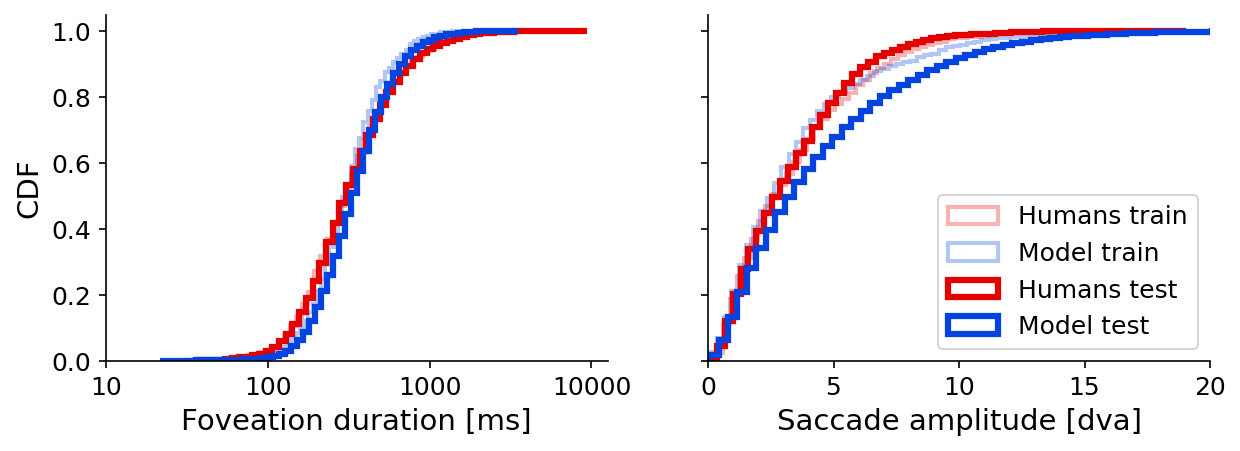

In [46]:
from matplotlib.patches import Polygon
def fix_hist_step_vertical_line_at_end(ax):
    """
    Get rid of vertical lines on the right of the histograms, as proposed here:
    https://stackoverflow.com/questions/39728723/vertical-line-at-the-end-of-a-cdf-histogram-using-matplotlib

    :param ax: Axis to be fixed
    :type ax: matplotlib.axes._subplots.AxesSubplot
    """
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])
        
fig, axs = plt.subplots(1,2,dpi=150, figsize=(9.5,3), sharey=True) # fov_dur & sac_amp 
mcl = ['xkcd:emerald', 'xkcd:blue', 'xkcd:cyan', 'xkcd:red', 'xkcd:pink', 'xkcd:purple']
for modus in ["train", "test"]:
    if modus == "train":
        gt_amp_dva = df_train_gt["sac_amp_dva"].dropna().values
        gt_dur_ms = df_train_gt["duration_ms"].dropna().values
        res_amp_dva = df_train_res["sac_amp_dva"].dropna().values
        res_dur_ms = df_train_res["duration_ms"].dropna().values
        kwargs = {"alpha":0.3, "lw":2} #"ls":"dotted", "lw":3,         
    else:
        gt_amp_dva = df_test_gt["sac_amp_dva"].dropna().values
        gt_dur_ms = df_test_gt["duration_ms"].dropna().values
        res_amp_dva = df_test_res["sac_amp_dva"].dropna().values
        res_dur_ms = df_test_res["duration_ms"].dropna().values
        kwargs = {"alpha":1, "lw":3}
    nbins = 60  # np.linspace(1, 4, 100)  # 60
    axs[0].hist(np.log10(gt_dur_ms), nbins, density=True, histtype='step', cumulative=True, label=f"Humans {modus}", color="xkcd:red", **kwargs)
    axs[0].hist(np.log10(res_dur_ms), nbins, density=True, histtype='step', cumulative=True, label=f"Model {modus}", color="xkcd:blue", **kwargs)
    
    axs[1].hist(gt_amp_dva, nbins, density=True, histtype='step', cumulative=True, label=f"Humans {modus}", color="xkcd:red", **kwargs)
    axs[1].hist(res_amp_dva, nbins, density=True, histtype='step', cumulative=True, label=f"Model {modus}", color="xkcd:blue", **kwargs)
    
fix_hist_step_vertical_line_at_end(axs[0])
fix_hist_step_vertical_line_at_end(axs[1])

axs[0].set_xticks([1,2,3,4])
axs[0].set_xlim([1, 4.1])
axs[0].set_xticklabels([10,100,1000,10000], size=14)
axs[0].tick_params(labelsize=12)
axs[0].set_xlabel('Foveation duration [ms]', size=14)
axs[0].set_ylabel('CDF', size=14)
axs[1].set_xlabel('Saccade amplitude [dva]', size=14)
axs[1].tick_params(labelsize=12)
axs[1].set_xlim([0, 20])
sns.despine()
plt.legend(loc="lower right", fontsize=12)
plt.show()

In [45]:
modus

'test'

### Plot GT scanpath for bouncy castle on video

In [ ]:
vid = "-5FU8vEKtyE"
VIDEO_PATH = f'/home/nico/project_data/UVO/videos/'
GAZE_PATH = '/home/nico/project_data/UVO/eye_data_EM-UnEye_2023-11-29/'

data_paths = sorted(glob.glob(GAZE_PATH + '*data.csv.gz'))
eye_paths = sorted(glob.glob(GAZE_PATH + '*eye.csv.gz'))
print(eye_paths)
print(data_paths)
subjects = [x.split('/')[-1].split('_')[1] for x in data_paths]
print(subjects)

In [ ]:
# all subjects 

colors = sns.color_palette('husl', len(subjects))

all_eye = pd.concat([pd.read_csv(x, compression='gzip', encoding='ISO-8859-1') for x in eye_paths])
all_data = pd.concat([pd.read_csv(x, compression='gzip', encoding='ISO-8859-1') for x in data_paths])


frame_paths = sorted(glob.glob(VIDEO_PATH + vid + '/images/*'))
viddata = all_data[all_data['filename'] == f"{vid}.mp4"]
rescaled_dim = (viddata.iloc[0]['movie_size_x'], viddata.iloc[0]['movie_size_y'])
x_offset = int(viddata.iloc[0]['movie_pos_x'])
y_offset = int(viddata.iloc[0]['movie_pos_y'])
os.makedirs(VIDEO_PATH + vid + '/gaze', exist_ok=True)

for f in frame_paths:
    if os.path.exists(VIDEO_PATH + vid + '/gaze/' + f.split('/')[-1]):
        continue
    print(vid, f" {int(f.split('/')[-1].split('.')[0]) + 1}/{len(frame_paths)} frames")
    frame = cv2.imread(f)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, rescaled_dim)
    display = np.ones((1080, 1920, 3), dtype=np.uint8) * 128
    display[y_offset:y_offset + frame.shape[0], x_offset:x_offset + frame.shape[1]] = frame
    plt.imshow(display)

    for s, sub in enumerate(subjects):
        subjdata = all_data[(all_data['filename'] == f"{vid}.mp4") & (all_data['subj_id'] == int(sub))]
        if len(subjdata) == 0:
            continue
        frame_eye = all_eye[(all_eye['ID'] == subjdata.iloc[0]['ID']) & (all_eye['frame'] == int(f.split('/')[-1].split('.')[0]) + 1)]
        if subjdata.iloc[0]['subj_dominant_eye'] == 0:
            domeye = 'l'
        else:
            domeye = 'r'
        plt.scatter(frame_eye[f'x{domeye}'], frame_eye[f'y{domeye}'], s=100, marker="x", c=np.array([colors[s]]), alpha=0.5)
    plt.axis('off')
    # store frame without white border
    plt.savefig(VIDEO_PATH + vid + '/gaze/' + f.split('/')[-1], bbox_inches='tight', pad_inches=0)
    plt.close()


In [ ]:
# single subject

s_idx = 0
s_eye = pd.read_csv(eye_paths[s_idx], compression='gzip', encoding='ISO-8859-1')
s_data = pd.read_csv(data_paths[s_idx], compression='gzip', encoding='ISO-8859-1')


frame_paths = sorted(glob.glob(VIDEO_PATH + vid + '/images/*'))
viddata = all_data[all_data['filename'] == f"{vid}.mp4"]
rescaled_dim = (viddata.iloc[0]['movie_size_x'], viddata.iloc[0]['movie_size_y'])
x_offset = int(viddata.iloc[0]['movie_pos_x'])
y_offset = int(viddata.iloc[0]['movie_pos_y'])
os.makedirs(VIDEO_PATH + vid + f'/gaze_{subjects[s_idx]}', exist_ok=True)

for f in frame_paths:
    if os.path.exists(VIDEO_PATH + vid + f'/gaze_{subjects[s_idx]}/' + f.split('/')[-1]):
        continue
    print(vid, f" {int(f.split('/')[-1].split('.')[0]) + 1}/{len(frame_paths)} frames")
    frame = cv2.imread(f)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, rescaled_dim)
    display = np.ones((1080, 1920, 3), dtype=np.uint8) * 128
    display[y_offset:y_offset + frame.shape[0], x_offset:x_offset + frame.shape[1]] = frame
    plt.figure(dpi=200)
    plt.imshow(display)

    subjdata = s_data[(s_data['filename'] == f"{vid}.mp4") & (s_data['subj_id'] == int(subjects[s_idx]))]
    if len(subjdata) == 0:
        continue
    frame_eye = s_eye[(s_eye['ID'] == subjdata.iloc[0]['ID']) & (s_eye['frame'] == int(f.split('/')[-1].split('.')[0]) + 1)]
    if subjdata.iloc[0]['subj_dominant_eye'] == 0:
        domeye = 'l'
    else:
        domeye = 'r'
    # scatter plot but clip to frame   
    plt.scatter(np.clip(frame_eye[f'x{domeye}'], 0, 1920), np.clip(frame_eye[f'y{domeye}'], 0, 1080), s=100, marker="x", c="xkcd:red", alpha=0.5)
    plt.axis('off')
    # store frame without white border
    plt.savefig(VIDEO_PATH + vid + f'/gaze_{subjects[s_idx]}/' + f.split('/')[-1], bbox_inches='tight', pad_inches=0)
    plt.close()


In [4]:
def plot_all_ablation(names, dirs, colors, lws=[]):
    dfs = [pd.read_csv(dir) for dir in dirs]
    if lws == []:
        lws = [2 for _ in range(len(names))]
    mean_sym = r"$\bar x$"; median_sym = r"$\tilde x$"

    # basic hists
    min_amp=0.5
    max_amp=30
    fig, axs = plt.subplots(1, 2, dpi=150, figsize=(9.5, 3), sharey=True)
    histtype = ["step" for _ in range(len(names))]
    filltype = [False for _ in range(len(names))]
    for i, df in enumerate(dfs):
        amp_dva = df["sac_amp_dva"].dropna().values
        if min_amp is not None:
            amp_dva = amp_dva[amp_dva > min_amp]
        dur_ms = df["duration_ms"].dropna().values
        label = f"{mean_sym}={round(np.mean(dur_ms), 1)}, {median_sym}={round(np.median(dur_ms), 1)}"
        bins_fd = np.linspace(1, 4, 50)
        sns.histplot(data=np.log10(dur_ms), kde=False, ax=axs[0], bins=bins_fd, color=colors[i], element=histtype[i],
                        fill=filltype[i], lw=lws[i], label=label)
        bins_sa = np.linspace(0, max_amp, 2*max_amp)
        label = f"{names[i]}: {mean_sym}={round(np.mean(amp_dva), 3)}, {median_sym}={round(np.median(amp_dva), 3)}"
        sns.histplot(data=amp_dva, kde=False, ax=axs[1], bins=bins_sa, color=colors[i], element=histtype[i],
                        fill=filltype[i], lw=lws[i],
                        label=label)
    axs[0].set_xticks([1, 2, 3, 4])
    axs[0].set_xticklabels([10, 100, 1000, 10000])
    axs[0].set_xlabel('Foveation duration [ms]', size=14)
    axs[0].set_ylabel('Count', size=14)
    axs[0].legend()
    axs[1].set_xlabel('Saccade amplitude [dva]', size=14)
    axs[1].set_xlim([0, max_amp])
    axs[0].tick_params(labelsize=12)
    axs[1].tick_params(labelsize=12)
    axs[1].legend()
    sns.despine(fig)
    fig.tight_layout()
    plt.show()

    # angles
    fig, axs = plt.subplots(1, 2, dpi=150, figsize=(7, 3), subplot_kw={'projection': 'polar'})
    for i, df in enumerate(dfs):
        hori_ang = df["sac_ang_h"].dropna().values
        prev_ang = df["sac_ang_p"].dropna().values
        x_p, kde_p = vonmises_kde(hori_ang / 180 * np.pi, 50)
        axs[0].plot(x_p, kde_p, color=colors[i], lw=lws[i])
        x_p, kde_p = vonmises_kde(prev_ang / 180 * np.pi, 50)
        axs[1].plot(x_p, kde_p, color=colors[i], lw=lws[i])
    axs[0].set_xticks(axs[0].get_xticks())  # ; axs[0].set_yticks(axs[0].get_yticks())
    axs[0].set_xticklabels(["", "45°", "", "135°", "", "-135°", "", "-45°"])
    axs[0].set_title('Angle to horizontal')
    axs[1].set_xticks(axs[1].get_xticks())  # ; axs[1].set_yticks(axs[1].get_yticks())
    axs[1].set_xticklabels(["", "45°", "", "135°", "", "-135°", "", "-45°"])
    axs[1].set_title('Angle relative to previous')
    plt.show()

    # IOR
    summary_measure="median"
    cutoff_t=3000
    ret_bins=45
    ang_bins=30
    sma_ws=5
    fig, axs = plt.subplots(1, 2, dpi=150, figsize=(8, 3), sharey=False)
    # kwargs = [{"alpha": 1, "label": name} for name in names]
    for i, df in enumerate(dfs):
        x_vals, all = fovdur_vs_sacang(df, ang_bins, sma_ws, summary_measure)
        axs[0].plot(x_vals, all, color=colors[i], lw=lws[i], label=names[i])  #**kwargs[i])

        bins = np.linspace(0, cutoff_t, ret_bins)
        counts, bins = np.histogram(df["ret_times"].dropna().values, bins)
        Nsac = len(df["sac_amp_dva"].dropna())
        axs[1].plot((bins[1:] + bins[:-1]) / 2, counts / Nsac, color=colors[i], lw=lws[i], label=names[i])  #**kwargs[i])
    axs[1].legend()
    axs[0].set_xlabel('Change in saccade direction [°]', size=13)
    axs[0].set_xlim(-180, 180)
    axs[0].set_xticks([-180, -90, 0, 90, 180])
    axs[0].set_ylabel(f'Fov. dur. ({summary_measure}) [ms]', size=13)
    axs[0].tick_params(labelsize=12)
    axs[0].set_title('Space-based IOR metric')
    axs[1].set_xlabel('Return time [ms]', size=13)
    axs[1].set_ylabel('Percentage of saccades', size=13)  # Density
    axs[1].tick_params(labelsize=12)
    axs[1].set_title('Object-based IOR metric')
    sns.despine(fig)
    fig.tight_layout()
    plt.show()

    # object eval
    maxframes = 90
    fig, axs = plt.subplots(1, 2, dpi=150, figsize=(8, 3), sharey=False)
    bdir_cols = ["xkcd:maroon", sns.color_palette("Dark2")[1], sns.color_palette("Dark2")[5], sns.color_palette("Dark2")[6]]
    labels = ["Background", "Detection", "Inspection", "Revisit"]
    # kwargs = [{"alpha": 1, "lw": 3}] + [{"alpha": 1, "lw": 1} for _ in range(4)]
    for i, df in enumerate(dfs):
        if i == 0:
            cols = bdir_cols
        else:
            cols = [colors[i] for _ in range(4)]
        ratios = get_BDIR_per_frames(df, maxframes)
        for j in range(4):
            axs[0].plot(ratios[j], color=cols[j], alpha=1, lw=lws[i]) #**kwargs[i])
    for i in range(1,len(names)):
        df_gt_obj = evaluate_all_obj(dfs[0], prefix="gt_")
        df_obj = evaluate_all_obj(dfs[i], prefix="sim_")
        merged_df = pd.merge(df_gt_obj, df_obj, how="outer", on=['video', 'gt_object'])
        merged_df = merged_df[merged_df.gt_object != "nan"]
        merged_df = merged_df.fillna(0)
        axs[1].scatter(merged_df['gt_tot_t'], merged_df['sim_tot_t'], marker='x', c=colors[i], alpha=0.5)
        axs[1].plot([0, merged_df['gt_tot_t'].max()], [0, merged_df['gt_tot_t'].max()], ls=":", color="k")
        slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df['gt_tot_t'], merged_df['sim_tot_t'])
        print(f"slope: {slope}, intercept: {intercept}, r_value: {r_value}, p_value: {p_value}, std_err: {std_err}, r2 : {r_value ** 2}")
        label = names[i] + r", $r^2$" + f"= {np.round(r_value ** 2, 2)}"
        axs[1].plot(merged_df['gt_tot_t'], intercept + slope * merged_df['gt_tot_t'], c=colors[i], label=label, alpha=0.7)
    axs[0].set_ylabel("Percentage")
    axs[0].set_xlabel("Time [frames]")
    axs[1].set_ylabel("Model total dwell time [ms]")  # \n(mean for objects across runs)
    axs[1].set_xlabel("Human total dwell time [ms]")  # (mean for each object across subjects)
    axs[1].set_xticks([0, 1000, 2000, 3000])
    axs[1].set_yticks([0, 1000, 2000, 3000])
    axs[1].legend(prop={'size': 8})
    sns.despine(fig)
    fig.tight_layout()
    plt.show()


## Object-based ablation combined plot

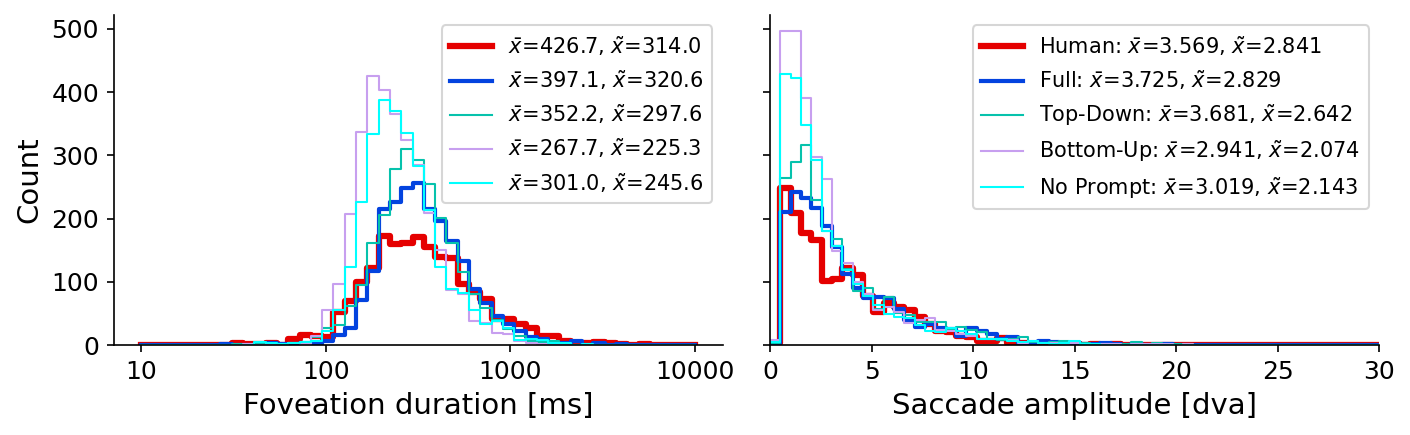

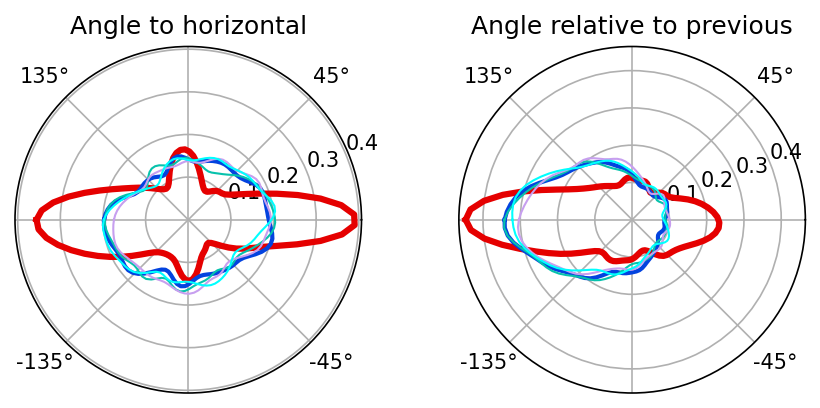

/home/nico/project_code/domip_scanpathes/src/summary_plots.py:144: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  agg_df = agg_df.append(agg_df.assign(angle_bin=agg_df['angle_bin'] + num_bins)).append(
/home/nico/project_code/domip_scanpathes/src/summary_plots.py:144: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  agg_df = agg_df.append(agg_df.assign(angle_bin=agg_df['angle_bin'] + num_bins)).append(
/home/nico/project_code/domip_scanpathes/src/summary_plots.py:144: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  agg_df = agg_df.append(agg_df.assign(angle_bin=agg_df['angle_bin'] + num_bins)).append(
/home/nico/project_code/domip_scanpathes/src/summary_plots.py:144: FutureWarning: The frame.append method is deprecated and will b

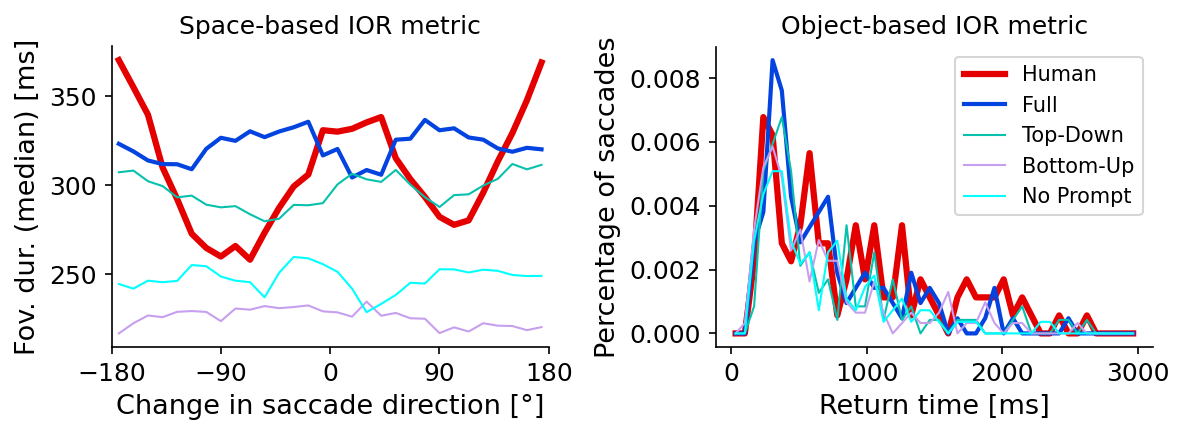

[23.05232512 43.72796988 25.74492306  7.47478194]
[18.75073075 46.45348131 26.88269434  7.9130936 ]
[20.62791501 44.12827114 28.08978759  7.15402626]
[20.82233075 36.17906527 37.62301076  5.37559322]
[22.77572416 36.9183337  34.19113633  6.11480581]
slope: 0.6557361743910546, intercept: 147.56875132471197, r_value: 0.7579900529671286, p_value: 6.851280313536812e-10, std_err: 0.08411708114889052, r2 : 0.5745489203971105
slope: 0.5987255377072738, intercept: 141.46599677056304, r_value: 0.7177254822014274, p_value: 2.8773896979247263e-08, std_err: 0.0885824944012631, r2 : 0.5151298678012715
slope: 0.7136892209794694, intercept: 67.69959390611217, r_value: 0.8419040827636448, p_value: 8.061949335080318e-13, std_err: 0.0705855347620797, r2 : 0.7088024845740941
slope: 0.6655902998594523, intercept: 117.45154708229677, r_value: 0.7487906673718431, p_value: 5.060400371945644e-09, std_err: 0.09090938385129682, r2 : 0.5606874635431701


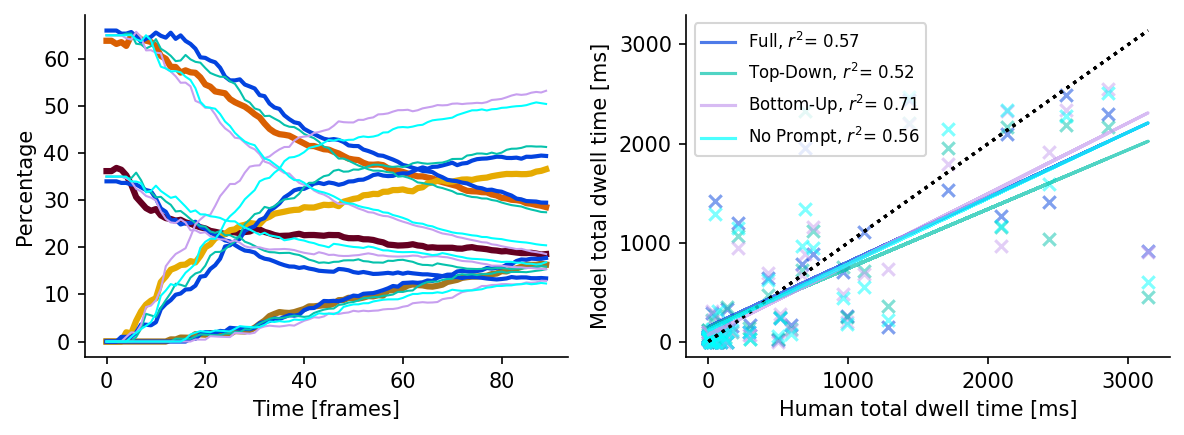

In [5]:
names = ["Human", "Full", "Top-Down", "Bottom-Up", "No Prompt"]
RES_PATH = "/media/nico/scanpath_backup/scanpath_results_current/"
model_dirs = ["2023-12-08-14-22-51_cb_no_sacmo_dv3", "2023-12-09-00-21-32_cb_no_sacmo_dv3_no_bottomup", "2023-12-09-09-57-40_cb_no_sacmo_dv3_no_topdown", "2023-12-09-18-32-41_cb_no_sacmo_dv3_no_prompt"]
model_dirs = [os.path.join(RES_PATH, d, "df_res_fov.csv") for d in model_dirs]
dirs = ["/media/nico/scanpath_backup/eye_data_EM-UnEye_2023-11-29/df_res_gt_fov_train.csv"] + model_dirs
# colors = ["xkcd:red", "xkcd:blue", "#3569e5", "#688eec", "#9ab4f2"]
colors = ["xkcd:red", "xkcd:blue", "xkcd:turquoise", "xkcd:lavender", "xkcd:cyan"]
lws = [3,2,1,1,1]

plot_all_ablation(names, dirs, colors, lws)

## Exploration ablation

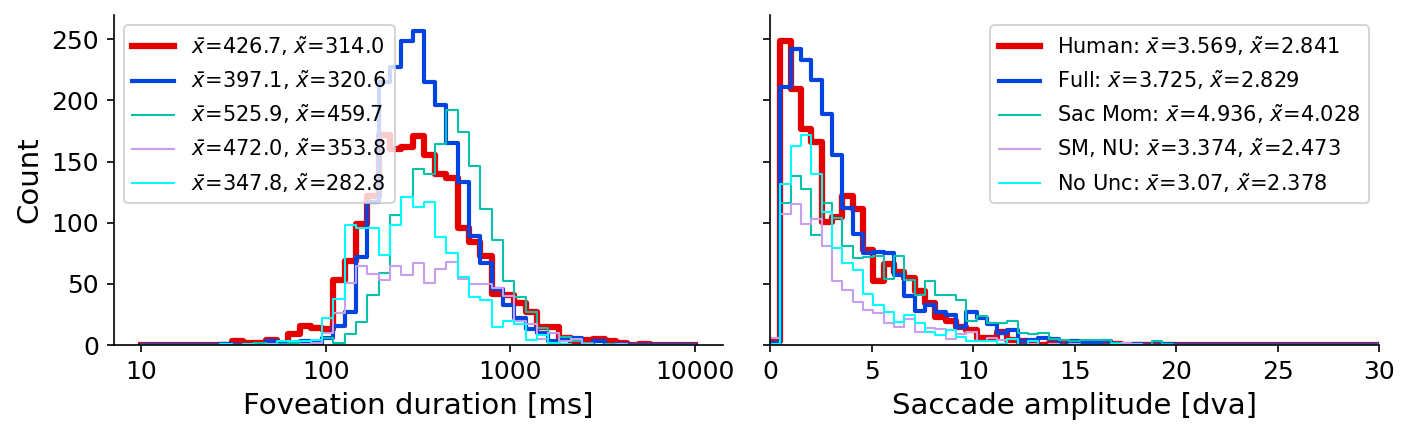

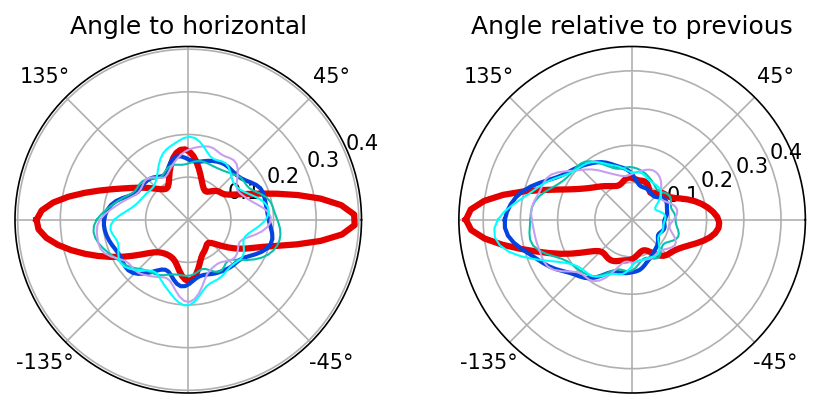

/home/nico/project_code/domip_scanpathes/src/summary_plots.py:144: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  agg_df = agg_df.append(agg_df.assign(angle_bin=agg_df['angle_bin'] + num_bins)).append(
/home/nico/project_code/domip_scanpathes/src/summary_plots.py:144: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  agg_df = agg_df.append(agg_df.assign(angle_bin=agg_df['angle_bin'] + num_bins)).append(
/home/nico/project_code/domip_scanpathes/src/summary_plots.py:144: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  agg_df = agg_df.append(agg_df.assign(angle_bin=agg_df['angle_bin'] + num_bins)).append(
/home/nico/project_code/domip_scanpathes/src/summary_plots.py:144: FutureWarning: The frame.append method is deprecated and will b

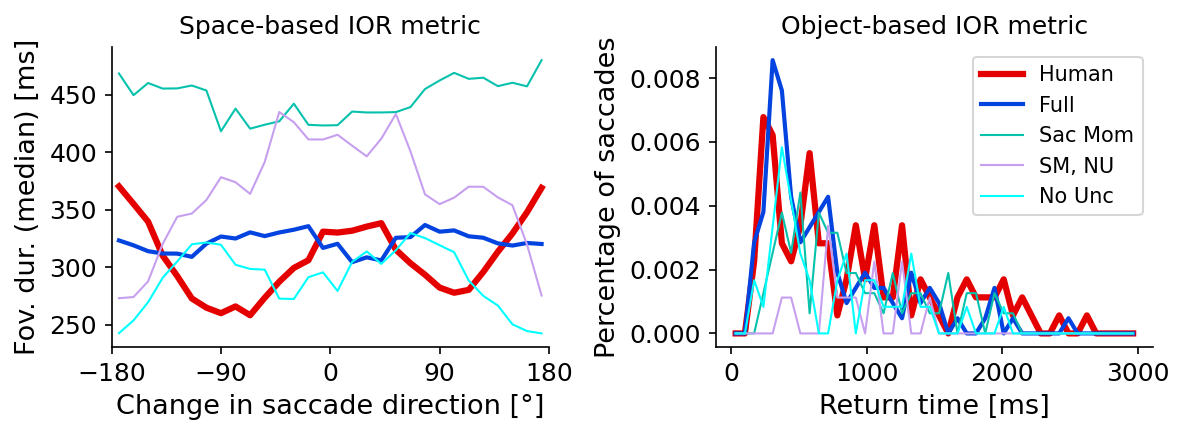

[23.05232512 43.72796988 25.74492306  7.47478194]
[18.75073075 46.45348131 26.88269434  7.9130936 ]
[20.08557253 49.96809427 24.84374296  5.10259025]
[16.16986852 41.13677022 41.28590364  1.40745762]
[15.94573804 40.73411026 38.97289551  4.34725619]
slope: 0.6557361743910546, intercept: 147.56875132471197, r_value: 0.7579900529671286, p_value: 6.851280313536812e-10, std_err: 0.08411708114889052, r2 : 0.5745489203971105
slope: 0.6196246130673762, intercept: 185.5916690452575, r_value: 0.7490477542709161, p_value: 9.160157874598372e-10, std_err: 0.08080469873237561, r2 : 0.5610725381783027
slope: 0.8679358450097597, intercept: 65.96132954445534, r_value: 0.8162426345850121, p_value: 2.4038747061859496e-10, std_err: 0.10098963397286023, r2 : 0.6662520385142816
slope: 0.8019627187422764, intercept: 63.716520595985344, r_value: 0.8408598364030118, p_value: 5.9871768302598514e-12, std_err: 0.08266059524608355, r2 : 0.7070452644756997


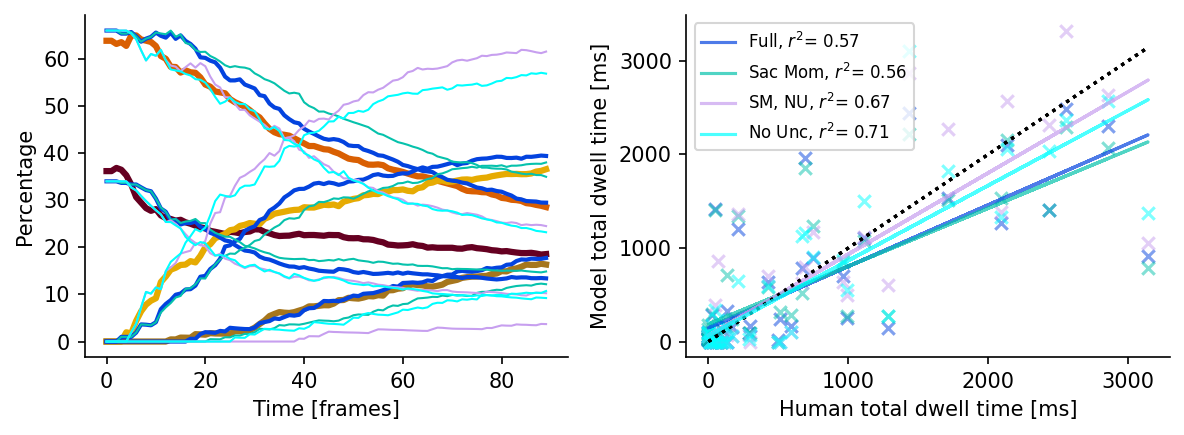

In [6]:
names = ["Human", "Full", "Sac Mom", "SM, NU", "No Unc"]
RES_PATH = "/media/nico/scanpath_backup/scanpath_results_current/"
model_dirs = ["2023-12-08-14-22-51_cb_no_sacmo_dv3", "2023-12-11-17-53-27_cb_sacmo01_dv3", "2023-12-12-22-05-17_cb_sacmo01_no_uncer_dv5", "2023-12-12-16-54-00_cb_no_sacmo_no_uncer_dv5"]
model_dirs = [os.path.join(RES_PATH, d, "df_res_fov.csv") for d in model_dirs]
dirs = ["/media/nico/scanpath_backup/eye_data_EM-UnEye_2023-11-29/df_res_gt_fov_train.csv"] + model_dirs
colors = ["xkcd:red", "xkcd:blue", "xkcd:turquoise", "xkcd:lavender", "xkcd:cyan"]
lws = [3,2,1,1,1]

plot_all_ablation(names, dirs, colors, lws)

## Individual components

In [9]:
names = ["Human", "Full", "Top-Down", "Bottom-Up", "No Prompt"]
short = ["GT", "Fl", "TD", "BU", "NP"]
RES_PATH = "/media/nico/scanpath_backup/scanpath_results_current/"
model_dirs = ["2023-12-08-14-22-51_cb_no_sacmo_dv3", "2023-12-09-00-21-32_cb_no_sacmo_dv3_no_bottomup", "2023-12-09-09-57-40_cb_no_sacmo_dv3_no_topdown", "2023-12-09-18-32-41_cb_no_sacmo_dv3_no_prompt"]
model_dirs = [os.path.join(RES_PATH, d, "df_res_fov.csv") for d in model_dirs]
dirs = ["/media/nico/scanpath_backup/eye_data_EM-UnEye_2023-11-29/df_res_gt_fov_train.csv"] + model_dirs
colors = ["xkcd:red", "xkcd:blue", "#3569e5", "#688eec", "#9ab4f2"]
dfs = [pd.read_csv(dir) for dir in dirs]
mean_sym = r"$\bar x$"; median_sym = r"$\tilde x$"


In [ ]:
min_amp=0.5
max_amp=30


fig, axs = plt.subplots(1, 2, dpi=150, figsize=(9.5, 3), sharey=True)
histtype = ["step" for _ in range(len(names))]
filltype = [False for _ in range(len(names))]

for i, df in enumerate(dfs):
    amp_dva = df["sac_amp_dva"].dropna().values
    if min_amp is not None:
        amp_dva = amp_dva[amp_dva > min_amp]
    dur_ms = df["duration_ms"].dropna().values
    label = f"{mean_sym}={round(np.mean(dur_ms), 1)}, {median_sym}={round(np.median(dur_ms), 1)}"
    bins_fd = np.linspace(1, 4, 50)
    sns.histplot(data=np.log10(dur_ms), kde=False, ax=axs[0], bins=bins_fd, color=colors[i], element=histtype[i],
                    fill=filltype[i], lw=2, label=label)
    # axs[0].set_title(f'FOV Duration: mean={round(np.mean(dur_ms),1)}, median={round(np.median(dur_ms),1)}')
    bins_sa = np.linspace(0, max_amp, 2*max_amp)
    label = f"{names[i]}: {mean_sym}={round(np.mean(amp_dva), 3)}, {median_sym}={round(np.median(amp_dva), 3)}"
    sns.histplot(data=amp_dva, kde=False, ax=axs[1], bins=bins_sa, color=colors[i], element=histtype[i],
                    fill=filltype[i], lw=2,
                    label=label)
    # axs[1].set_title(f'SAC Amplitude: mean={round(np.mean(amp_dva), 3)}, median={round(np.median(amp_dva),3)}')

axs[0].set_xticks([1, 2, 3, 4])
axs[0].set_xticklabels([10, 100, 1000, 10000])
axs[0].set_xlabel('Foveation duration [ms]', size=14)
axs[0].set_ylabel('Count', size=14)
axs[0].legend()
axs[1].set_xlabel('Saccade amplitude [dva]', size=14)
axs[1].set_xlim([0, max_amp])
axs[0].tick_params(labelsize=12)
axs[1].tick_params(labelsize=12)
axs[1].legend()

sns.despine(fig)
fig.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, dpi=150, figsize=(7, 3), subplot_kw={'projection': 'polar'})

for i, df in enumerate(dfs):
    hori_ang = df["sac_ang_h"].dropna().values
    prev_ang = df["sac_ang_p"].dropna().values
    x_p, kde_p = vonmises_kde(hori_ang / 180 * np.pi, 50)
    axs[0].plot(x_p, kde_p, color=colors[i], lw=3)
    x_p, kde_p = vonmises_kde(prev_ang / 180 * np.pi, 50)
    axs[1].plot(x_p, kde_p, color=colors[i], lw=3)

axs[0].set_xticks(axs[0].get_xticks())  # ; axs[0].set_yticks(axs[0].get_yticks())
axs[0].set_xticklabels(["", "45°", "", "135°", "", "-135°", "", "-45°"])
axs[0].set_title('Angle to horizontal')
axs[1].set_xticks(axs[1].get_xticks())  # ; axs[1].set_yticks(axs[1].get_yticks())
axs[1].set_xticklabels(["", "45°", "", "135°", "", "-135°", "", "-45°"])
axs[1].set_title('Angle relative to previous')
plt.show()

In [ ]:
summary_measure="median"
cutoff_t=3000
ret_bins=45
ang_bins=30
sma_ws=5

fig, axs = plt.subplots(1, 2, dpi=150, figsize=(8, 3), sharey=False)
kwargs = [{"alpha": 1, "lw": 2, "label": name} for name in names]

for i, df in enumerate(dfs):
    x_vals, all = fovdur_vs_sacang(df, ang_bins, sma_ws, summary_measure)
    axs[0].plot(x_vals, all, color=colors[i], **kwargs[i])

    bins = np.linspace(0, cutoff_t, ret_bins)
    counts, bins = np.histogram(df["ret_times"].dropna().values, bins)
    Nsac = len(df["sac_amp_dva"].dropna())
    axs[1].plot((bins[1:] + bins[:-1]) / 2, counts / Nsac, color=colors[i], **kwargs[i])

axs[1].legend()

axs[0].set_xlabel('Change in saccade direction [°]', size=13)
axs[0].set_xlim(-180, 180)
axs[0].set_xticks([-180, -90, 0, 90, 180])
axs[0].set_ylabel(f'Fov. dur. ({summary_measure}) [ms]', size=13)
axs[0].tick_params(labelsize=12)
axs[0].set_title('Space-based IOR metric')

axs[1].set_xlabel('Return time [ms]', size=13)
axs[1].set_ylabel('Percentage of saccades', size=13)  # Density
axs[1].tick_params(labelsize=12)
axs[1].set_title('Object-based IOR metric')

sns.despine(fig)
fig.tight_layout()
plt.show()

In [ ]:
maxframes = 90

fig, axs = plt.subplots(1, 2, dpi=150, figsize=(8, 3), sharey=False)
bdir_cols = ["xkcd:maroon", sns.color_palette("Dark2")[1], sns.color_palette("Dark2")[5], sns.color_palette("Dark2")[6]]
labels = ["Background", "Detection", "Inspection", "Revisit"]
kwargs = [{"alpha": 1, "lw": 3}] + [{"alpha": 1, "lw": 1} for _ in range(4)]

for i, df in enumerate(dfs):
    if i == 0:
        cols = bdir_cols
    else:
        cols = [colors[i] for _ in range(4)]
    ratios = get_BDIR_per_frames(df, maxframes)
    for j in range(4):
        axs[0].plot(ratios[j], color=cols[j], **kwargs[i])

for i in range(1,len(names)):
    df_gt_obj = evaluate_all_obj(dfs[0], prefix="gt_")
    df_obj = evaluate_all_obj(dfs[i], prefix="sim_")
    merged_df = pd.merge(df_gt_obj, df_obj, how="outer", on=['video', 'gt_object'])
    merged_df = merged_df[merged_df.gt_object != "nan"]
    merged_df = merged_df.fillna(0)
    axs[1].scatter(merged_df['gt_tot_t'], merged_df['sim_tot_t'], marker='x', c=colors[i], alpha=0.5)
    axs[1].plot([0, merged_df['gt_tot_t'].max()], [0, merged_df['gt_tot_t'].max()], ls=":", color="k")
    slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df['gt_tot_t'], merged_df['sim_tot_t'])
    print(f"slope: {slope}, intercept: {intercept}, r_value: {r_value}, p_value: {p_value}, std_err: {std_err}, r2 : {r_value ** 2}")
    label = names[i] + r", $r^2$" + f"= {np.round(r_value ** 2, 2)}"
    axs[1].plot(merged_df['gt_tot_t'], intercept + slope * merged_df['gt_tot_t'], c=colors[i], label=label, alpha=0.7)


axs[0].set_ylabel("Percentage")
axs[0].set_xlabel("Time [frames]")
# legend_elements = [Line2D([0], [0], color=bdir_cols[i], lw=2, label=labels[i]) for i in range(4)]
# axs[0].legend(handles=legend_elements)

axs[1].set_ylabel("Model total dwell time [ms]")  # \n(mean for objects across runs)
axs[1].set_xlabel("Human total dwell time [ms]")  # (mean for each object across subjects)
axs[1].set_xticks([0, 1000, 2000, 3000])
axs[1].set_yticks([0, 1000, 2000, 3000])
axs[1].legend(prop={'size': 8})
sns.despine(fig)
fig.tight_layout()
plt.show()
